<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="250" height="250"><br>
</center>


 - (https://bit.ly/hg-09-1)
 - (https://bit.ly/hg-09-2)
 - (https://bit.ly/hg-09-3)
 

# Chapter09. 텍스트를 위한 인공 신경망 ( 댓글은 분석하라!)

- 학습목표
    - 텍스트와 시계열 데이터와 같은 순차 데이터에 잘 맞는 신경망의 개념과 구성 요소에 대해 배운다
    - 케라스 API로 기본적인 순환 신경망에서 고급 순환 신경망을 만들어 영화 감상평을 분류하는 작업에 적용해 본다.
    - 순환 신경망에서 발생하는 문제점과 이를 극복하기 위한 해결책을 살펴본다.
    
    
## 09-1 순차 데이터와 순환 신경망

- 핵심 키워드
    - 순차 데이터
    - 순환 신경망
    - 셸
    - 은닉 상태
    - 순차 데이터의 특징을 알고 순환 신경망의 개념을 학습한다.
    
#### 문제 상황

상품 페이지의 수많은 댓글을 일일이 확인하기 어렵다. 설령 마케팅 팀의 모든 직원이 나눠서 확인하더라도 사람마다 댓글의 좋고 나쁨을 가르는 기준이 달라서 이또한 문제이다.


### 순차 데이터

**순차 데이터 sequential data**는 텍스트나 **시계열 데이터 time seires data** 와 같이 순서에 의미가 깅ㅆ는 데이터를 말한다. 예를 들어 "I am a boy"는 쉽게 이해 할수 있지만 "boy am a I"는 말이 되지 않는다. 또 일별 온도를 기록한 데이터에서 날짜 순서를 뒤죽박죽 섞는다면 내일의 온도르르 쉽게 예상하기 어렵다.

지금까지 우리가 보았던 데이터는 순서와는 상관이 없다. 예로 패션 MNIST 데이터를 생각해보자. 이 데이터를 신경망 모델에 전달할 때 샘플을 랜덤하게 섞은 후 훈련 세트와 검증 세트로 나누었다. 즉 샘플의 순서와 전혀 상관이 없다. 심지어 골고루 섞는 편이 결과가 더 좋다.

이는 딥러닝뿐만 아니라 일반적인 머신러닝 모델에서도 마찬가지이다. 4장에서 봤던 생선 데이터나 패션 MNIST 데이터는 어떤 샘플이 먼저 주입되어도 모델의 학습에 큰 영향을 미치지 않는다.

이 장에서 사용하려는 댓글, 즉 텍스트 데이터는 단어의 순서가 중요한 순차 데이터이다. 이런 데이터는 순서를 유지하며 신경망에 주입해야 한다. 단어의 순서를 마구 섞어서 주입하면 안된다.

따라서 순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 기능이 필요하다. 예를 들어 "별로지만 추천해요" 에서 "추천해요"가 입력될 때 "별로지만"을 기억하고 있어야 이 댓글을 무조건 긍정적이라고 판단하지 않을 것이다.

완전 연결 신경망이나 합성곱 신경망은 이런 기억 장치가 없다. 하나의 샘플(또는 하나의 배치)을 사용하여 정방향 계산을 수행하고 나면 그 샘플은 버려지고 다음 샘플을 처리할 때 재사용하지 않습니다. 이렇게 입력 데이터의 흐름이 앞으로만 전달되는 신경망을 **피드포워드 신경망 feedforward neural network FFNN**이라고 한다. 이전 장에서 배웠던 완전 연결 신경망과 합성곱 신경망이 모두 피드포워드 신경망에 속한다.

신경망이 이전에 처리했던 샘플을 다음 샘플을 처리하는데 재사용하기 위해서는 이렇게 데이터 흐름이 앞으로만 전달되어서는 곤란하다. 다음 샘플을 위해서 이전 데이터가 신경망 층에 순환될 필요가 있다. 이런 신경망이 바로 순환 신경망이다.

### 순환 신경망

**순환 신경망 recurrent neural network, RNN**은 일반적인 완전 연결 신경망과 거의 비슷하다. 완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리 하나만 추가하면 된다. 

그래서 순환 신경망에서는 '이전 샘플에 대한 기억을 가지고 있다'고 종종 말한다. 이렇게 샘플을 처리하는 한 단계를 **타임스텝 timestep**이라고 말한다. 순환 신경망은 이전 타임스텝의 샘플을 기억하지만 타임스텝이 오래 될수록 순환되는 정보는 희미해 진다. 나중에 여기에 대해서 다시 자세히 언급하겠다.

순환 신경망에는 특별히 층을 **셀 cell** 이라고 부른다. 한 셀에는 여러 개의 뉴런이 있지만 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현한다. 또 셀의 출력을 **은닉 상태 hidden state**라고 부른다.

합성곱 신경망에서처럼 신경망의 구조마다 조금씩 부르는 이름이 다를 수 있다. 하지만 기본 구조는 같다. 입력에 어떤 가중치를 곱하고 활성화 함수를 통과시켜 다음 층으로 보내는 거다. 달라지는 것은 츠으이 출력(즉 은닉 상태)을 다음 타임 스텝에 재사용한다는 것 뿐이다.

일반적으로 은닉층의 활성화 함수로는 하이퍼볼릭 탄젠트 hyperbolic tangent 함수인 tanh가 많이 사용된다. tanh함수도 S자 모양을 띠기 때문에 종종 시그모이드 함수라고 부르기도 한다. 하지만 헷갈릴 수 있으니 이 책에서는 이렇게 부르지 않겠다. tanh함수는 시그모이드 함수와는 달리 -1 ~ 1 사이의 범위를 가진다.

다른 신경망과 마찬가지로 순환 신경망 그림에도 번거로움을 피하기 위해 활성화 함수를 표시하지 않는 경우가 많다. 하지만 순환 신경망에서도 활성화 함수가 반드시 필요하다는 것을 꼭 기억하자.

합성곱 신경망과 같은 피드포워드 신경망에서 뉴런은 입력과 가중치를 곱한다. 순환 신경망에서도 동일하다. 다만 순환 신경망의 뉴런은 가중치가 하나 더 있다. 바로 이전 타임스텝의 은닉 상태에 곱해지는 가중치이다. 셀은 입력과 이전 타입스텝의 은닉 상태를 사용하여 현재 타임스텝의 은닉 상태를 만든다.


### 셀의 가중치와 입출력

순환 신경망의 셀에서 필요한 가중치 크기를 계산해 보겠다. 복잡한 모델을 배울수록 가중치 개수를 계산해 보면 잘 이해하고 알 수 있다. 예를 들어 다음 그림처럼 순환층에 입력되는 특성의 개수가 4개이고 순환층의 뉴런이 3개라고 가정해 보자. 먼저 Wx의 크기를 구해보자. 입력층과 순환층의 뉴런이 모두 완전 연결되기 때문에 가중치 Wx의 크기는 4 x 3 = 12개가 된다. 7장에서 본 완전 연결 신경망의 입력층과 은닉층의 연결과 같다. 그럼 순환층에서 다음 타임스텝에 재사용되는 은닉 상태를 위한 가중치 Wb의 크기는 어떻게 될까?

순환층에 있는 첫 번째 뉴런(r1)의 은닉 상태가 다음 타임스텝에 재사용될 때 첫 번째 뉴런과 두 번째, 세 번째 뉴런에 모두 전달 된다. 위 그림에서 붉은색으로 표시했다. 즉 이전 타임스텝의 은닉 상태는 다음 타임스텝의 뉴런에 완전히 연결된다.

두 번째 뉴런의 은닉 상태도 마찬가지로 첫 번째 뉴런과 두 번째 뉴런, 세 번째 뉴런에 모두 전달되고(파란 화살표), 세 번째 뉴런의 은닉 상태도 동일하다(검은 화살표). 따라서 이 순한층에서 은닉 상태를 위한 가중치 W3는 3 x 3 = 9 개이다. 가중치는 모두 구했으니 모델 파라미터 개수를 계산해 보자. 가중치에 절편을 더하면 된다. 여기엔 각 뉴런마다 하나의 절편이 있다. 따라서 이 순환층은 모두 12 + 9 + 3 =24개의 모델 파라미터를 가지고 있다. 이제 왜 순환층을 셀 하나로 표시할 수밖에 없는지 이해가 됬을 것이다. 은닉 상태가 모든 뉴런에 순환되기 때문에 완전 연결 신경망처럼 그림으로 표현하기는 너무 어렵다.

- 모델 파라미터 수 = Wx + Wb + 절편 = 12 + 9 + 3 = 24

순환층의 가중치 크기를 알아보았으므로 이번에는 순환층의 입력과 출력에 대해 생각해 보자. 이전 장에서 배웠던 합성곱 층의 입력은 전형적으로 하나의 샘플이 3개의 차원을 가진다. 너비, 높이, 채널이다. 입력이 합성곱 층과 풀링 층을 통과하면 너비,높이,채널(혹은 깊이)의 크기가 달라지지만 차원의 개수는 그대로 유지되었다.

순환층은 일반적으로 샘플마다 2개의 차원을 가진다. 보통 하나의 샘플을 하나의 시퀀스 sequence라고 말한다. 시퀀스 안에는 여러 개의 아이템이 들어 있다. 여기에서 시퀀스의 길이가 바로 타임스텝 길이가 된다.

예를 들어 어떤 샘플에 "I am a boy" 란 문장이 들어 있다고 가정해 보자. 이 샘플은 4개의 단어로 이루어져 있다. 각 단어를 3개의 어떤 숫자로 표현한다고 가정해 보자.( 이 숫자 표현에 대해서는 다음 절에 자세히 다루겠다.)

이런 입력이 순환층을 통과하면 두 번째, 세 번째 차원이 사라지고 순환층의 뉴런 개수만큼 출력된다. 이를 차근차근 설명해 보겠다. 하나의 샘플은 시퀀스 길이(여기서에서는 단어 개수) 와 단어표현(다음 절에서 다룬다)의 2차원 배열이다. 순환층을 통과하면 1차원 배열로 바뀐다. 이 1차원 배열의 크기는 순환층의 뉴런 개수에 의해 결정된다. 셀이 모든 타입스텝에서 출력을 만든 것처럼 표현했다. 하지만 사실 순환층은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보낸다.

마지막으로 출력층의 구성에 대해 알아보겠다. 합성곱 신경망과 마찬가지로 순환 신경망도 마지막에는 밀집층을 두어 클래스를 분류한다. 다중 분류일 경우에는 출력층에 클래스 개수만큼 뉴런을 두고 소프트맥스 활성화 함수를 사용한다. 이진 분류일 경우에는 하나의 뉴런을 두고 시그모이드 활성화 함수를 사용한다.


### 순환 신경망으로 순환 데이터 처리 - 문제해결 과정

이번 절에서 순차 데이터와 순환 신경망을 소개했다. 먼저 순차 데이터의 특징을 예를 들어 소개했고 순환 신경망의 개념과 주요 구성 요소를 소개했다. 여기에는 순환층, 셀, 은닉 상태 등이 포함된다.

순환층은 순서를 가진 데이터를 처리하기 위해 밀집 신경망이나 합성곱 신경망과는 계산하는 방식이 다르다. 은닉층의 출력을 다음 층으로만 보내지 않고 다음 순서에 다시 재사용하는 순환 구조로 되어 있다.

하지만 거시적인 구조는 다른 신경망과 크게 다르지 않다. 입력에 가중치를 곱하고 절편을 더한 다음 활서화 함수를 통과시켜 다음 층으로 전달하는 것이다. 다만 순환층은 이전 타임스텝의 출력을 입력으로 함께 사용한다. 또 마지막 타임스텝의 출력만 다음 층으로 전달하다는 것을 잊지 말자.

다음 절에서는 템서플로와 케라스를 사용해 순차 데이터와 순환 신경망을 직접 만들어 영화 감상평을 긍정과 부정으로 분류해보겠다.

## 09-2 순환 신경망으로 IMDB 리뷰 분류하기

- 핵심키워드
    - 말뭉치
    - 토큰
    - 원-핫 인코딩
    - 단어 임베딩
    - 텐서플로를 사용해 순환 신경망을 만들어 영화 리뷰 데이터셋에 적용해서 리뷰를 긍정과 부정으로 분류한다.
    
1절에서 순환 신경망의 작동 원리를 살펴보았다. 이번 절에서는 대표적인 순환 신경망 문제인 IMDB 리뷰 데이터셋을 사용해 가장 간단한 순환 신경망 모델을 훈련해 보겠다.

이 데이터셋을 두 가지 방법으로 변형하여 순환 신경망에 주입해보겠다. 하나는 원-핫 인코딩 이고 또 다른 하나는 단어 임베딩이다. 이 두 가지 방법의 차이점에 대해 설명하고 순환 신경망을 만들 때 고려해야 할 점을 알아보겠다.

그럼 먼저 이 절에서 사용할 IMDB 리뷰 데이터셋을 적재해 보겠다.

### IMDB 리뷰 데이터셋

IMDB 리뷰 데이터셋은 유명한 인터넷 영화 데이터베이스인 imdb.com에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터셋이다. 총 50,000개의 샘플로 이루어져 있고 훈련 데이터와 테스트 데이터에 각각 25,000개씩 나누어져 있다.

- 자연어 처리와 말뭉치란 무엇인가?
    - 자연어 처리(natural language processing, NLP)는 컴퓨터를 사용해 인간의 언어를 처리하는 분야이다. 대표적인 세부 분야로는 음성 인식, 기계번역, 감성 분석등이 있다. IMDB 리뷰를 감성평에 따라 분류하는 작업은 감성 분석에 해당한다. 자연어 처리 분야에서는 훈련 데이터를 종종 **말뭉치 corpus**라고 부른다. 예를 들어 IMDB 리뷰 데이터셋이 하나의 말뭉치 이다.
    
사실 텍스트 자체를 신경망에 전달하지는 않는다. 컴퓨터에서 처리하는 모든 것은 어떤 숫자 데이터이다. 앞서합성곱 신경망에서 이미지를 다룰 때는 특별한 변환을 하지 않는다. 이미지가 정수 픽셀값으로 이루어져 있기 때문이다. 텍스트 데이터의 경우 단어를 숫자 데이터로 바꾸는 일반적인 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여하는 것이다. 

예를들어 'he'를 10으로 매핑하고 'cat'을 13에 매핑하더라고 'cat'이 'he'보다 좋거나 크다는 뜻이 아니다. 이 정숫값 사이에는 어떤 관계도 없다. 일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리한다. 이렇게 분리된 단어를 **토큰 token**이라고 부른다. 하나의 샘플은 여러 개의 토큰으로 이루어져 있고 1개의 토큰이 하나의 타임스탬프에 해당한다.

- 간단한 문제라면 영어 말뭉치에서 토큰을 단어와 같게 봐도 좋다. 한국어는 조금 다르다.

- 한글 문장은 어떻게 토큰을 분리하나요?
    - 한글은 조사가 발달되어 있기 때문에 공백으로 나누는 것만으로 부족하다. 일반적으로 한글은 형태소 분석을 통해 토큰을 만든다. KoNLPy를 참고


토큰에 할당하는 정수 중에 몇 개는 특정한 용도로 예약되어 있는 경우가 많다. 예를 들어 0은 패딩, 1은 문장의 시작, 2는 어휘 사전에 없는 토큰을 나타낸다.

- 어휘 사전은 무엇인가?
    - 훈련 세트에서 고유한 단어를 뽑아 만든 목록을 어휘 사전이라고 말한다. 예를 들어 테스트 세트 안에 어휘 사전에 없는 단어가 있다면 2로 변환하여 신경망 모델에 주입한다.
    
실제 IMDB 리뷰 데이터셋은 영어로 된 문장이지만 편리하게도 텐서플로에는 이미 정수로 바꾼 데이터가 포함되어있다. tensorflow.keras.datasets 패키지 아래 imdb 모듈을 임포트하여 이 데이터를 적재해 보겠다. 여기에서는 전체 데이터셋에서 가장 자주 등장하는 단어 500개만 사용하겠다. 이렇게 하기 위해 load_data() 함수의 num_words 매개변수를 500으로 지정한다.

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data ( num_words=500)

/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

17465344/17464789 [==============================] - 1s 0us/step


/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


먼저 훈련 세트와 테스트 세트의 크기를 확인해 보겠다.

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


앞서 말했듯이 이 데이터셋은 훈련 세트와 테스트 세트가 각각 25,000 개의 샘플로 이루어져 있다. 그런데 배열이 1차원인 게 이상하지 않나? IMDB 리뷰 텍스트는 길이가 제각각이다. 따라서 고정 크기의 2차원 배열에 담기 보다는 리뷰마다 별도의 파이썬 리스트로 담아야 메모리르 효율적으로 사용할 수 있다. 즉 앞의 그림처럼 이 데이터는 개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 넘파이 배여이다.

넘파이 배열은 정수가 실수 외에도 파이썬 객체를 담을 수 있다. 그럼 다음과 같이 첫 번째 리뷰의 길이를 출력해 보자.

In [3]:
print(len((train_input[0])))

218


첫 번째 리뷰의 길이는 218개의 토큰으로 이루어져 있다. 두 번째 리뷰의 길이를 확인해 보자.

In [4]:
print(len(train_input[1]))

189


몇 개 더 핼 술도 있겠지만 리뷰마다 각각 길이가 다르다. 여기서 하나의 리뷰가 하나의 샘플이 된다. 서로 다른 길이의 샘플을 어떻게 신경망에 전달하는지 잠시 후 살펴본다. 이제 첫 번째 리뷰에 담긴 내용을 출력해 보자.

In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


앞서 설명했듯이 텐서플로에 있는 IMDB 리뷰 데이터는 이미 정수로 변환되어 있다. 앞서 num_words=500으로 지정했기 때문에 어휘 사전에는 500개의 단어만 들어가 있다. 따라서 어휘 사전에 없는 단어는 모두 2로 표시 되어 나타난다.

- 어떤 기준으로 500개의 단어를 고른것인가?
    - imdb.load_data() 함수는 전체 어휘 사전에 있는 단어를 등장 횟수 순서대로 나열한 다음 가장 많이 등장한 500개의 단어를 선택한다.

이번에는 타깃 데이터를 출력해 보자.

In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


해결할 문제는 리뷰가 긍정인지 부정인지를 판단하는 거다. 그러면 이진 분류 문제로 볼 수 있으므로 타깃값이 0(부정)과 1(긍정)로 나누어진다. 

데이터를 더 살펴보기 전에 훈련 세트에서 검증 세트를 떼어 놓도록 하자. 원래 훈련 세트의 크기가 25,000개였으므로 20%를 검증 세트로 떼어 놓으면 훈련 세트의 크기는 20,000개로 줄어들 것이다.

In [8]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split (train_input, train_target, test_size=0.2, random_state=42)

이제 훈련 세트에 대해 몇 가지 조사를 해 보겠다. 먼저 각 리뷰의 길이를 계산해 넘파이 배열에 담자. 이렇게 하는 이유는 평균적인 리뷰의 길이와 가장 짧은 리뷰의 길이 그리고 가장 긴 리뷰의 길이를 확인하고 싶기 때문이다. 이를 위해 넘파이 리스트 내포를 사용해 train_input의 원소를 순회하면서 길이를 재도록 하겠다.

In [9]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

lengths 배열이 준비되었으므로 넘파이 mean() 함수와 mediad() 함수를 사용해 리뷰 길이의 평균과 중간값을 구해보자.

In [10]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


리뷰의 편균 단어 개수는 239개이고 중간값이 178인 것으로 보아 이 리뷰 길이 데이터는 한쪽에 치우친 분포를 보일 것 같다. lengths  배열을 히스토그램으로 표현해 보자.

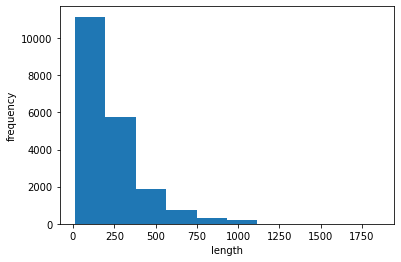

In [11]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()